<a href="https://colab.research.google.com/github/jespimentel/produtividade_ssp/blob/main/pris%C3%B5es_e_apreens%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prisões e apreensões de 2024 e 2025 em Piracicaba**
### Dados da SSP
### José Eduardo de Souza Pimentel

---

In [1]:
import pandas as pd
import ipywidgets as widgets
import folium
from folium.plugins import MarkerCluster
from os import path
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Seleciona o município de interesse
municipio='PIRACICABA'

In [4]:
%%time
caminho=('/content/drive/MyDrive/Datasets/ssp/DadosProdutividade_2024.xlsx')
sheet_name='PRESOS E APREENDIDOS_2024'
df_2024 = pd.read_excel(caminho, sheet_name=sheet_name)
df_2024 = df_2024[df_2024['NOME_MUNICIPIO'] == municipio]

CPU times: user 1min 51s, sys: 1.08 s, total: 1min 52s
Wall time: 2min 1s


In [5]:
%%time
caminho=('/content/drive/MyDrive/Datasets/ssp/DadosProdutividade_2025.xlsx')
sheet_name='PRESOS E APREENDIDOS_2025'
df_2025 = pd.read_excel(caminho, sheet_name=sheet_name)
df_2025 = df_2025[df_2025['NOME_MUNICIPIO'] == municipio]

CPU times: user 10.2 s, sys: 64.8 ms, total: 10.3 s
Wall time: 10.4 s


In [6]:
df_2025.columns

Index(['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA',
       'NOME_MUNICIPIO', 'ANO_BO', 'NUM_BO', 'CIDADE',
       'NOME_DEPARTAMENTO_CIRC', 'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC',
       'NOME_MUNICIPIO_CIRC', 'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA_BO',
       'DATAHORA_REGISTRO_BO', 'DATA_COMUNICACAO_BO', 'DESCR_PERIODO',
       'FLAG_FLAGRANTE', 'FLAG_STATUS', 'DESCR_TIPOLOCAL',
       'DESCR_SUBTIPOLOCAL', 'BAIRRO', 'CEP', 'LOGRADOURO',
       'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'CONT_PESSOA',
       'DESCR_TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR_CURTIS',
       'DESCR_PROFISSAO', 'DESCR_GRAU_INSTRUCAO', 'NACIONALIDADE_PESSOA',
       'NATUREZA_APURADA', 'MES_ESTATISTICA', 'ANO '],
      dtype='object')

In [7]:
# Concatena os dataframes
df_combined = pd.concat([df_2024, df_2025], ignore_index=True)
df_combined['PRESO_APREENDIDO'] = df_combined['IDADE_PESSOA'].apply(lambda x: 'Adolescente' if x < 18 else 'Imputável')
df_combined = df_combined[['ANO ', 'MES_ESTATISTICA', 'NOME_MUNICIPIO', 'ANO_BO', 'NUM_BO', 'DATA_OCORRENCIA_BO','HORA_OCORRENCIA_BO', 'FLAG_FLAGRANTE',
                           'PRESO_APREENDIDO','DESCR_TIPOLOCAL','DESCR_SUBTIPOLOCAL', 'BAIRRO', 'CEP', 'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE',
                           'LONGITUDE','DESCR_TIPO_PESSOA','SEXO_PESSOA', 'IDADE_PESSOA', 'COR_CURTIS','DESCR_PROFISSAO', 'DESCR_GRAU_INSTRUCAO']]
df_combined.to_excel('presos_e_apreendidos.xlsx', index=False)
df_combined.sample(5)

,ANO,MES_ESTATISTICA,NOME_MUNICIPIO,ANO_BO,NUM_BO,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,FLAG_FLAGRANTE,PRESO_APREENDIDO,DESCR_TIPOLOCAL,...,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,DESCR_TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR_CURTIS,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
1191,2024,8,PIRACICABA,2024,KP4259,2024-08-05,14:10:57.0000000,S,Imputável,Comércio e Serviços,...,RUA BARONESA DONA RITA,344.0,-22.735962,-47.634259,Indiciado,M,29.0,Branca,NaN,NaN
1402,2024,9,PIRACICABA,2024,MA6059,2024-09-02,20:26:31.0000000,S,Imputável,Via Pública,...,RUA HUMBERTO ZOCA,254.0,-22.759028,-47.675866,Indiciado,M,38.0,Branca,Pedreiro,NaN
583,2024,4,PIRACICABA,2024,ET3831,2024-04-05,18:00:00,S,Adolescente,Via Pública,...,RUA PRINCIPAL,70.0,-22.746650,-47.673931,Adolescente infrator,M,15.0,Parda,NaN,NaN
1621,2024,10,PIRACICABA,2024,OM5605,2024-10-21,12:00:00.0000000,N,Imputável,Unidade Rural,...,VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,0.000000,0.000000,Capturado,M,53.0,Preta,Ajudante geral,Superior incompleto
495,2024,3,PIRACICABA,2024,DJ5605,2024-03-09,11:00:00,S,Imputável,Via Pública,...,RUA NELSOM CAMPONÊS DO BRASIL,88.0,-22.740785,-47.630227,Indiciado,M,28.0,Parda,NaN,NaN


In [8]:
bairros = sorted(df_combined['BAIRRO'].astype(str).unique().tolist())
n=0
for bairro in bairros:
    print(bairro, end= ', ')
    n+=1
    if n%5==0:
        print()

ABAETÉ, AGUA BRANCA, ALEMÃES, ALGODOAL, ALTO, 
ALTOS DO SÃO FRANCISCO, ANHUMAS, AREA RURAL, AREIAO, AREIÃO, 
ARTEMIS, BOA ESPERANÇA, BONGUE, BOSQUE DOS LENHEIROS, CAMPESTRE, 
CANTA GALO, CANTAGALO, CAPIM FINO, CASTELINHO, CECAP, 
CENTRO, CENTRO (TUPI), CENTRO (ÁRTEMIS), CENTRO COMERCIAL AGRÍCOLA TAQUARAL, CHÁCARA SÃO JORGE, 
CIDADE ALTA, CIDADE JARDIM, COMUNIDADE PORTELINHA, CONCEIÇÃO, CONJUNTO HABITACIONAL AGUA BRANCA, 
CONJUNTO RESIDENCIAL MARIO DEDINI, COSTA RICA, DOIS CORREGOS, DOIS CÓRREGOS, ENGENHO CENTRAL, 
ENXOFRE, ESTÂNCIA LAGO AZUL (ARTEMIS), GARCAS, GIBOIA, GLEBA CALIFÓRNIA, 
GLEBAS, GLEBAS ALIANCA, GLEBAS CALIFORNIA, GLEBAS CALIFÓRNIA, GODINHO, 
GRAN PARK RESIDENCIAL, GRANDE PARQUE RESIDENCIAL, GUAMIUM, HIGIENÓPOLIS, IAA, 
IBITIRUNA, INDEPENDENCIA, JARAGUA, JARAGUÁ, JARDIM ABAETE, 
JARDIM ALVORADA, JARDIM ASTURIAS I, JARDIM BARTIRA (TUPI), JARDIM BELVEDERE, JARDIM BELVERDE, 
JARDIM BOA VISTA, JARDIM BRASIL, JARDIM CALIFORNIA, JARDIM CAMARGO, JARDIM CAXAMBU, 
JARDIM COLINA V

In [9]:
# Substitui 'MÁRIO DEDINE' por 'MÁRIO DEDINI' na coluna 'BAIRRO'
df_combined['BAIRRO'] = df_combined['BAIRRO'].replace('MÁRIO DEDINE', 'MÁRIO DEDINI')

# Filtra os bairros selecionados
bairros_selecionados = ['MÁRIO DEDINI','BOSQUE DOS LENHEIROS','ALGODOAL']
df_combined_selecionado = df_combined[df_combined['BAIRRO'].isin(bairros_selecionados)]

In [10]:
contagem = df_combined_selecionado.groupby(['ANO ', 'MES_ESTATISTICA', 'BAIRRO','PRESO_APREENDIDO'])['PRESO_APREENDIDO'].count().unstack().fillna(0)
contagem.reset_index(inplace=True)
contagem ['ano_mes'] = contagem['ANO '].astype(str) + '-' + contagem['MES_ESTATISTICA'].astype(str)
contagem = contagem.drop(columns=['ANO ', 'MES_ESTATISTICA'])
contagem = contagem.set_index('ano_mes')
contagem

PRESO_APREENDIDO,BAIRRO,Adolescente,Imputável
ano_mes,,,
2024-1,ALGODOAL,0.0,2.0
2024-1,BOSQUE DOS LENHEIROS,0.0,3.0
2024-1,MÁRIO DEDINI,0.0,1.0
2024-2,ALGODOAL,0.0,5.0
2024-2,BOSQUE DOS LENHEIROS,2.0,1.0
2024-3,ALGODOAL,0.0,4.0
2024-3,BOSQUE DOS LENHEIROS,0.0,3.0
2024-4,ALGODOAL,0.0,1.0
2024-4,BOSQUE DOS LENHEIROS,0.0,3.0


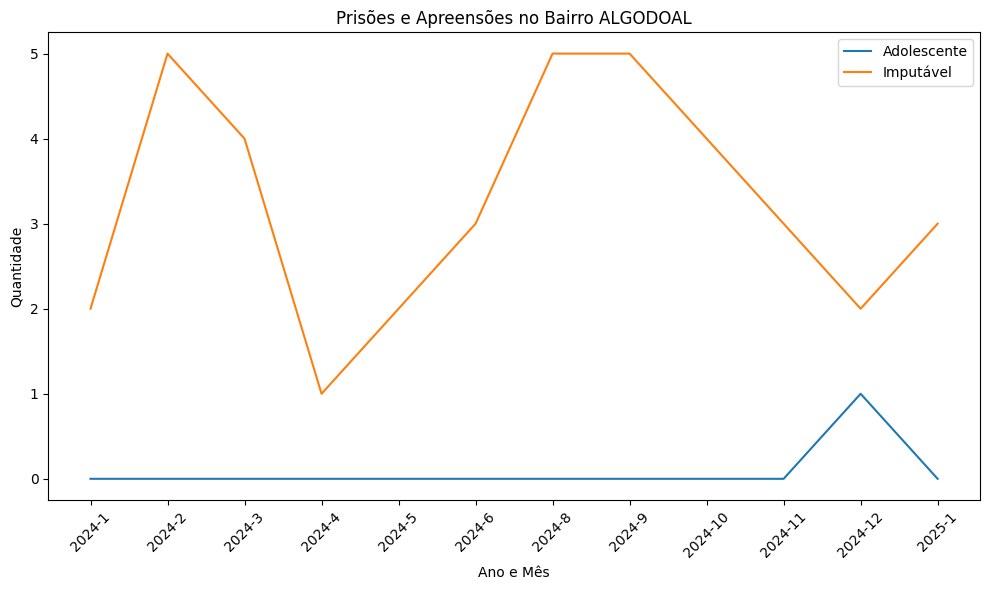

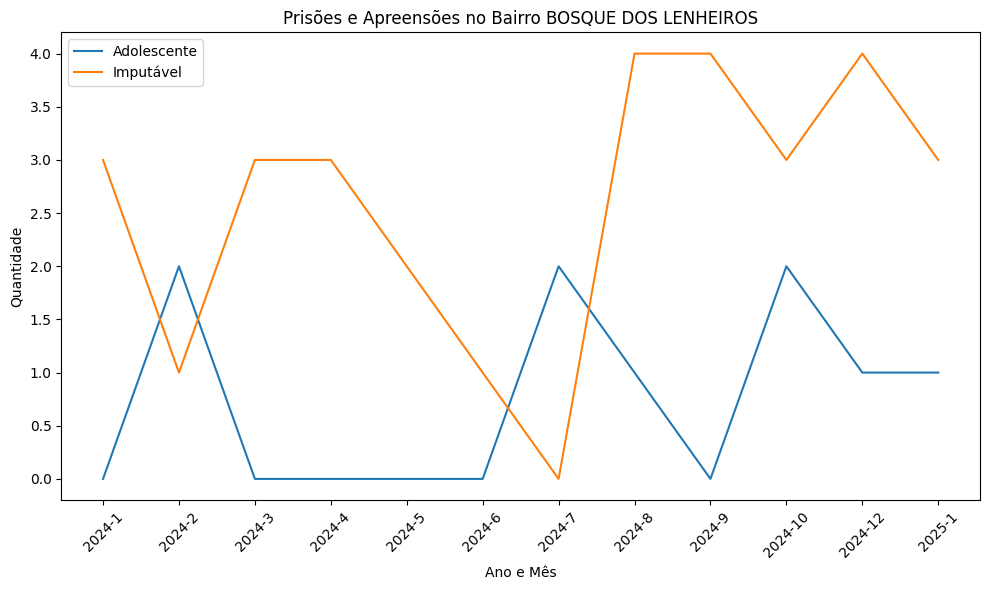

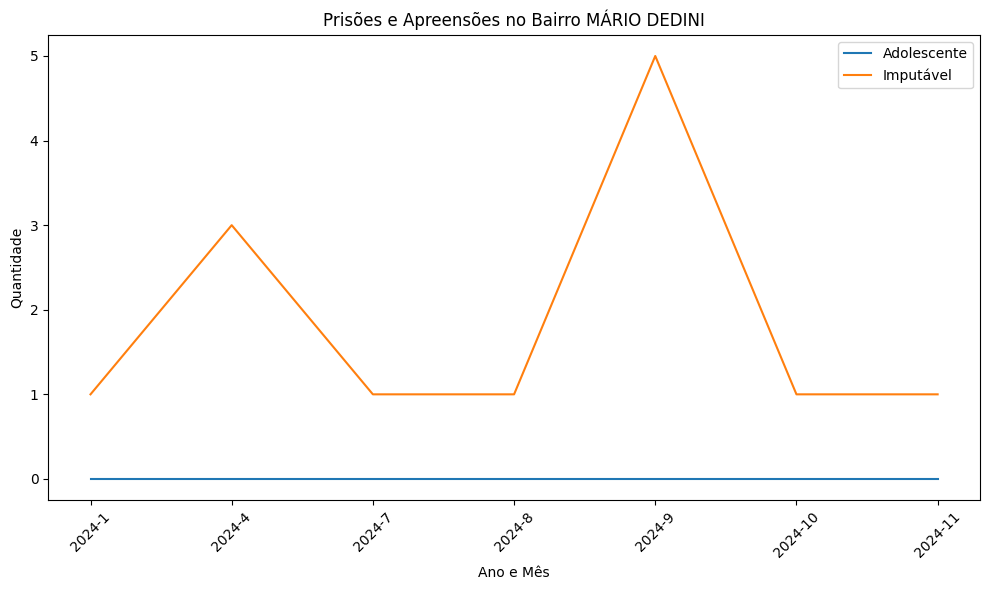

In [11]:
for bairro in contagem['BAIRRO'].unique():
  df_bairro = contagem[contagem['BAIRRO'] == bairro]
  plt.figure(figsize=(10, 6))
  plt.plot(df_bairro.index, df_bairro['Adolescente'], label='Adolescente')
  plt.plot(df_bairro.index, df_bairro['Imputável'], label='Imputável')
  plt.title(f'Prisões e Apreensões no Bairro {bairro}')
  plt.xlabel('Ano e Mês')
  plt.ylabel('Quantidade')
  plt.legend()
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.savefig(f'grafico_bairro_{bairro}.png')
  plt.show()
  plt.close()  # Fecha a figura para evitar sobreposição
